In [2]:
# Data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt

# ML preprocessing and models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# For saving/loading model
import pickle


In [3]:
# Load the dataset
df = pd.read_csv('./dataset/Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# data Visualization

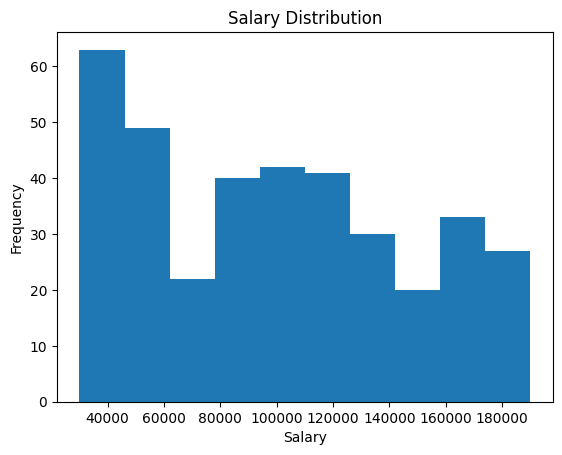

In [7]:
# Visualize salary distribution to check for outliers
plt.hist(df['Salary'])
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Filter out extreme salaries to remove outliers
df = df[(df['Salary'] < 200000) & (df['Salary'] > 25000)]

# Data Preprocessing

In [9]:
# Convert Gender to numeric (Male = 1, Female = 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])

# Check for any remaining missing values
print(df.isnull().sum())


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [10]:
# Select input features and target column
X = df[['Age', 'Gender', 'Years of Experience', 'Education Level', 'Job Title']]
y = df[['Salary']]


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale input features
x_scaler = MinMaxScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

# Scale target (salary)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [12]:
# Train different regression models and evaluate them
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf')
}

# Loop through each model, train, and evaluate
for name, model in models.items():
    if name == "Support Vector Regression":
        # SVR requires scaled inputs and outputs
        model.fit(X_train_scaled, y_train_scaled.ravel())
        y_pred_scaled = model.predict(X_test_scaled).reshape(-1, 1)
        y_pred = y_scaler.inverse_transform(y_pred_scaled)
    else:
        # Other models work on unscaled outputs
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")


Linear Regression - MSE: 238406445.14, R²: 0.89
Decision Tree - MSE: 173648648.65, R²: 0.92


C:\Users\RAMRAJE\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - MSE: 134093427.33, R²: 0.94
Support Vector Regression - MSE: 193420323.87, R²: 0.91


In [13]:
# Train XGBoost model (requires scaled input and output)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train_scaled.ravel())

# Predict and inverse-transform to original salary scale
y_pred_scaled = xgb_model.predict(X_test_scaled).reshape(-1, 1)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor - MSE:", round(mse, 2))
print("R² Score:", round(r2, 2))


XGBoost Regressor - MSE: 107753977.38
R² Score: 0.95


In [14]:
# Save the best performing model and scalers for deployment
pickle.dump(xgb_model, open('salary_model.pkl', 'wb'))
pickle.dump(x_scaler, open('x_scaler.pkl', 'wb'))
pickle.dump(y_scaler, open('y_scaler.pkl', 'wb'))

In [15]:
# Load saved model and test a prediction
loaded_model = pickle.load(open('salary_model.pkl', 'rb'))

# Provide scaled input: [Age, Gender, Experience, Education Level, Job Title]
test_input = [[0.5, 1, 0.4, 2, 5]]  # These values should be scaled manually or through UI
prediction = loaded_model.predict(test_input)

print("Sample Prediction (scaled input):", prediction)


Sample Prediction (scaled input): [0.31359914]
